# --------------------------------------- INITIALIZATION ---------------------------------------

# Import PYTHON PACKAGES

In [2]:
from glob import glob ## used to manage finding path, files >>> docs.python.org/3/library/glob.html
import rasterio as rio ## is a module that handles satellite imagery and geography. To extract numerical information from image data >>> rasterio.readthedocs.io
import numpy as np ## used for creating multidimensional arrays >>> numpy.org
import earthpy.plot as ep ## used for plotting raster images >>> earthpy.readthedocs.io
from skimage import io ## Image management module >>> scikit-image.org
import matplotlib.pyplot as plt ## Module for displaying images and graphs >>> matplotlib.org
from matplotlib.colors import ListedColormap ## for defining the color space used for displaying images
import pandas as pd ## A module that will help manage data more easily. By making it in table format (Data Frame) >>> pandas.pydata.org
import seaborn as sns ## is a module suitable for displaying statistical graphics >>> seaborn.pydata.org
### The module for scaling numerical data before modeling is Normalization >>> scikit-learn.org
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import RobustScaler
###

from sklearn import metrics ## for creating Confustion matrix >>> scikit-learn.org

from sklearn.metrics import classification_report ## Details of the model's classification results >>> scikit-learn.org

from sklearn.metrics import accuracy_score ## for calculating the classification accuracy of the model >>> scikit-learn.org

from sklearn.model_selection import train_test_split ## Splitting numbers used for testing and training for Hold-out Method >>> scikit-learn.org

from sklearn.model_selection import cross_val_score ## used to calculate test results Cross-validation for data set >>> scikit-learn.org

from sklearn.model_selection import StratifiedKFold ## create test Cross-validation for data set >>> scikit-learn.org

from sklearn.neighbors import KNeighborsClassifier ## Calling the K-Nearest Neighbor Algorithm >>> scikit-learn.org

from sklearn.ensemble import RandomForestClassifier ## Calling the RandomForest algorithm >>> scikit-learn.org

from sklearn.svm import SVC ## Running Support Vector Machine algorithms >>> scikit-learn.org

import lightgbm as lgb ## Calling the Light Gradient Boosted Machine Algorithm >>> lightgbm.readthedocs.io

import warnings ## Module for handling python kernel notifications
warnings.filterwarnings(action='ignore') ## Turn off all notifications from the system.

# Set PATH

In [4]:
SEC_1_POST_QPB_IMG_PATH = 'IMAGES/PB/1/' ## Image folder
SEC_2_POST_QPB_IMG_PATH = 'IMAGES/PB/2/' ## Image folder
SEC_3_POST_QPB_IMG_PATH = 'IMAGES/PB/3/' ## Image folder
SEC_4_POST_QPB_IMG_PATH = 'IMAGES/PB/4/' ## Image folder

SEC_1_POST_QPB = "R1_T47QPB_20210228T034701_" ## File name in folder
SEC_2_POST_QPB = "R2_T47QPB_20210228T034701_" ## File name in folder
SEC_3_POST_QPB = "R3_T47QPB_20210228T034701_" ## File name in folder
SEC_4_POST_QPB = "R4_T47QPB_20210228T034701_" ## File name in folder

SEC_1_POST_QPB_GROUNDTRUTH_PATH = "R1_T47QPB_20210228T034701_GT_20m.tif" #name of answer image file
SEC_2_POST_QPB_GROUNDTRUTH_PATH = "R2_T47QPB_20210228T034701_GT_20m.tif" #name of answer image file
SEC_3_POST_QPB_GROUNDTRUTH_PATH = "R3_T47QPB_20210228T034701_GT_20m.tif" #name of answer image file
SEC_4_POST_QPB_GROUNDTRUTH_PATH = "R4_T47QPB_20210228T034701_GT_20m.tif" #name of answer image file

SEC_1_POST_QPB_IMG_SET = glob(f'{SEC_1_POST_QPB_IMG_PATH }{SEC_1_POST_QPB}*B?*.tif') #use glob to collect paths and names of given files
SEC_2_POST_QPB_IMG_SET = glob(f'{SEC_2_POST_QPB_IMG_PATH }{SEC_2_POST_QPB}*B?*.tif') #use glob to collect paths and names of given files
SEC_3_POST_QPB_IMG_SET = glob(f'{SEC_3_POST_QPB_IMG_PATH }{SEC_3_POST_QPB}*B?*.tif') #use glob to collect paths and names of given files
SEC_4_POST_QPB_IMG_SET = glob(f'{SEC_4_POST_QPB_IMG_PATH }{SEC_4_POST_QPB}*B?*.tif') #use glob to collect paths and names of given files

SEC_1_POST_QPB_IMG_SET.sort() ## Arrange spectral band images of sentinel-2 satellite
SEC_2_POST_QPB_IMG_SET.sort() ## Arrange spectral band images of sentinel-2 satellite
SEC_3_POST_QPB_IMG_SET.sort() ## Arrange spectral band images of sentinel-2 satellite
SEC_4_POST_QPB_IMG_SET.sort() ## Arrange spectral band images of sentinel-2 satellite

# --------------------------------------- DATA ACQUISITION ------- --------------------------------

# Import image data with Rasterio

In [5]:
SEC_1_POST_QPB_RASTER = np.array([]) ## Create a numpy array to store all rasterized images
SEC_2_POST_QPB_RASTER = np.array([]) ## Create a numpy array to store all rasterized images
SEC_3_POST_QPB_RASTER = np.array([]) ## Create a numpy array to store all rasterized images
SEC_4_POST_QPB_RASTER = np.array([]) ## Create a numpy array to store all rasterized images

SEC_1_BUFF = [] ## Create a list to store raster data for each image
SEC_2_BUFF = [] ## Create a list to store raster data for each image
SEC_3_BUFF = [] ## Create a list to store raster data for each image
SEC_4_BUFF = [] ## Create a list to store raster data for each image

for _ in SEC_1_POST_QPB_IMG_SET:
 with rio.open(_, 'r') as img: ## Using rio to read satellite images and convert them numerically
 SEC_1_BUFF.append(img.read(1))
 
for _ in SEC_2_POST_QPB_IMG_SET:
 with rio.open(_, 'r') as img: ## Using rio to read satellite images and convert them numerically
 SEC_2_BUFF.append(img.read(1))
 
for _ in SEC_3_POST_QPB_IMG_SET:
 with rio.open(_, 'r') as img: ## Using rio to read satellite images and convert them numerically
 SEC_3_BUFF.append(img.read(1))
 
for _ in SEC_4_POST_QPB_IMG_SET:
 with rio.open(_, 'r') as img: ## Using rio to read satellite images and convert them numerically
 SEC_4_BUFF.append(img.read(1))
 
 
SEC_1_POST_QPB_RASTER = np.stack(SEC_1_BUFF) ## Take the list that stores the raster data of each image and convert it to a multidimensional array
SEC_2_POST_QPB_RASTER = np.stack(SEC_2_BUFF) ## Take the list that stores the raster data of each image and convert it to a multidimensional array
SEC_3_POST_QPB_RASTER = np.stack(SEC_3_BUFF) ## Take the list that stores the raster data of each image and convert it to a multidimensional array
SEC_4_POST_QPB_RASTER = np.stack(SEC_4_BUFF) ## Take the list that stores the raster data of each image and convert it to a multidimensional array

Available_bands = [ 'Blue', 'Green', 'Red','VRE1','VRE2','VRE3', 'NIR', 'SWIR1', 'SWIR2'] ## list of bands used in the arrangement. in order

# Import the answer image (Ground Truth)

In [6]:
SEC_1_POST_QPB_GROUNDTRUTH = io.imread( ## Import solution photo with Skimage
 SEC_1_POST_QPB_IMG_PATH + SEC_1_POST_QPB_GROUNDTRUTH_PATH, ## set file address
 as_gray=True ## Read images as Gray Scale
) 
SEC_2_POST_QPB_GROUNDTRUTH = io.imread( ## Import solution photo with Skimage
 SEC_2_POST_QPB_IMG_PATH + SEC_2_POST_QPB_GROUNDTRUTH_PATH, ## set file address
 as_gray=True ## Read images as Gray Scale
) 

SEC_3_POST_QPB_GROUNDTRUTH = io.imread( ## Import solution photo with Skimage
 SEC_1_POST_QPB_IMG_PATH + SEC_1_POST_QPB_GROUNDTRUTH_PATH, ## set file address
 as_gray=True ## Read images as Gray Scale
) 
SEC_4_POST_QPB_GROUNDTRUTH = io.imread( ## Import solution photo with Skimage
 SEC_2_POST_QPB_IMG_PATH + SEC_2_POST_QPB_GROUNDTRUTH_PATH, ## set file address
 as_gray=True ## Read images as Gray Scale
) 


SEC_1_POST_QPB_GROUNDTRUTH_GRAY = np.array(SEC_1_POST_QPB_GROUNDTRUTH) ## Convert List to Numpy Array
SEC_2_POST_QPB_GROUNDTRUTH_GRAY = np.array(SEC_2_POST_QPB_GROUNDTRUTH) ## Convert List to Numpy Array
SEC_3_POST_QPB_GROUNDTRUTH_GRAY = np.array(SEC_1_POST_QPB_GROUNDTRUTH) ## Convert List to Numpy Array
SEC_4_POST_QPB_GROUNDTRUTH_GRAY = np.array(SEC_2_POST_QPB_GROUNDTRUTH) ## Convert List to Numpy Array

intensity = 0.6 ## Set the intensity from 0 - 1 (0 is the most intense)

SEC_1_POST_QPB_GROUNDTRUTH_MASK = (SEC_1_POST_QPB_GROUNDTRUTH_GRAY < intensity).astype(int) ## Select only pixels with intensity less than the specified intensity
SEC_2_POST_QPB_GROUNDTRUTH_MASK = (SEC_2_POST_QPB_GROUNDTRUTH_GRAY < intensity).astype(int) ## Select only pixels with intensity less than the specified intensity
SEC_3_POST_QPB_GROUNDTRUTH_MASK = (SEC_3_POST_QPB_GROUNDTRUTH_GRAY < intensity).astype(int) ## Select only pixels with intensity less than the specified intensity
SEC_4_POST_QPB_GROUNDTRUTH_MASK = (SEC_4_POST_QPB_GROUNDTRUTH_GRAY < intensity).astype(int) ## Select only pixels with intensity less than the specified intensity value.

# --------------------------------------- DATA EXPLORATION ------- --------------------------------

# Convert Array data to DataFrame

### Image data

In [7]:
SEC_1_POST_QPB_DF = np.moveaxis(SEC_1_POST_QPB_RASTER, 0, -1) ## Change Array dimension
SEC_2_POST_QPB_DF = np.moveaxis(SEC_2_POST_QPB_RASTER, 0, -1) ## Change Array dimension
SEC_3_POST_QPB_DF = np.moveaxis(SEC_3_POST_QPB_RASTER, 0, -1) ## Change Array dimension
SEC_4_POST_QPB_DF = np.moveaxis(SEC_4_POST_QPB_RASTER, 0, -1) ## Change Array dimension

SEC_1_POST_QPB_DF = SEC_1_POST_QPB_DF.reshape(-1, 9) ## Change the shape of the Array
SEC_2_POST_QPB_DF = SEC_2_POST_QPB_DF.reshape(-1, 9) ## Change the shape of the Array
SEC_3_POST_QPB_DF = SEC_3_POST_QPB_DF.reshape(-1, 9) ## Change the shape of the Array
SEC_4_POST_QPB_DF = SEC_4_POST_QPB_DF.reshape(-1, 9) ## Change the shape of the Array

SEC_1_POST_QPB_DF = pd.DataFrame(SEC_1_POST_QPB_DF) ## Convert Array to DataFrame
SEC_2_POST_QPB_DF = pd.DataFrame(SEC_2_POST_QPB_DF) ## Convert Array to DataFrame
SEC_3_POST_QPB_DF = pd.DataFrame(SEC_3_POST_QPB_DF) ## Convert Array to DataFrame
SEC_4_POST_QPB_DF = pd.DataFrame(SEC_4_POST_QPB_DF) ## Convert Array to DataFrame

### Answer

In [8]:
SEC_1_POST_QPB_GROUNDTRUTH_DF = SEC_1_POST_QPB_GROUNDTRUTH_MASK.reshape(-1)
SEC_2_POST_QPB_GROUNDTRUTH_DF = SEC_2_POST_QPB_GROUNDTRUTH_MASK.reshape(-1)
SEC_3_POST_QPB_GROUNDTRUTH_DF = SEC_3_POST_QPB_GROUNDTRUTH_MASK.reshape(-1)
SEC_4_POST_QPB_GROUNDTRUTH_DF = SEC_4_POST_QPB_GROUNDTRUTH_MASK.reshape(-1)

SEC_1_POST_QPB_GROUNDTRUTH_DF = pd.DataFrame(SEC_1_POST_QPB_GROUNDTRUTH_DF)
SEC_2_POST_QPB_GROUNDTRUTH_DF = pd.DataFrame(SEC_2_POST_QPB_GROUNDTRUTH_DF)
SEC_3_POST_QPB_GROUNDTRUTH_DF = pd.DataFrame(SEC_3_POST_QPB_GROUNDTRUTH_DF)
SEC_4_POST_QPB_GROUNDTRUTH_DF = pd.DataFrame(SEC_4_POST_QPB_GROUNDTRUTH_DF)

## Change feature name

### Image data

In [9]:
for _ in range(0,len(Available_bands)): ## Loop to change the name according to the list of bands initially defined. (Available_bands)
 SEC_1_POST_QPB_DF = SEC_1_POST_QPB_DF.rename(columns={_: Available_bands[_]})
 SEC_2_POST_QPB_DF = SEC_2_POST_QPB_DF.rename(columns={_: Available_bands[_]})
 SEC_3_POST_QPB_DF = SEC_3_POST_QPB_DF.rename(columns={_: Available_bands[_]})
 SEC_4_POST_QPB_DF = SEC_4_POST_QPB_DF.rename(columns={_: Available_bands[_]})

### Answer

In [10]:
SEC_1_POST_QPB_GROUNDTRUTH_DF = SEC_1_POST_QPB_GROUNDTRUTH_DF.rename(columns={0: 'Label'})
SEC_2_POST_QPB_GROUNDTRUTH_DF = SEC_2_POST_QPB_GROUNDTRUTH_DF.rename(columns={0: 'Label'})
SEC_3_POST_QPB_GROUNDTRUTH_DF = SEC_3_POST_QPB_GROUNDTRUTH_DF.rename(columns={0: 'Label'})
SEC_4_POST_QPB_GROUNDTRUTH_DF = SEC_4_POST_QPB_GROUNDTRUTH_DF.rename(columns={0: 'Label'})

# --------------------------------------- DATA PREPARATION ------- --------------------------------

In [11]:
SEC_1_DF = SEC_1_POST_QPB_DF ## Image data
SEC_2_DF = SEC_2_POST_QPB_DF ## Image data
SEC_3_DF = SEC_3_POST_QPB_DF ## Image data
SEC_4_DF = SEC_4_POST_QPB_DF ## Image data

SEC_1_LABEL = SEC_1_POST_QPB_GROUNDTRUTH_DF ## Answer
SEC_2_LABEL = SEC_2_POST_QPB_GROUNDTRUTH_DF ## Answer
SEC_3_LABEL = SEC_3_POST_QPB_GROUNDTRUTH_DF ## Answer
SEC_4_LABEL = SEC_4_POST_QPB_GROUNDTRUTH_DF ## Answer

# Extract Feature (Feature engineering)

## Extract new features from spectral reflectance values in DataFrame

### Geographic index value (Geographical index) calculated from the reflection value of each spectral wave

In [12]:
SEC_1_DF['NDVI'] = SEC_1_DF.apply(lambda row: (row.NIR - row.Red)/(row.NIR + row.Red), axis=1) ## Normalized Difference Vegetation Index
SEC_2_DF['NDVI'] = SEC_2_DF.apply(lambda row: (row.NIR - row.Red)/(row.NIR + row.Red), axis=1) ## Normalized Difference Vegetation Index
SEC_1_DF['GNDVI'] = SEC_1_DF.apply(lambda row: (row.NIR - row.Green)/(row.NIR + row.Green), axis=1) ## Green Normalized Difference Vegetation Index
SEC_2_DF['GNDVI'] = SEC_2_DF.apply(lambda row: (row.NIR - row.Green)/(row.NIR + row.Green), axis=1) ## Green Normalized Difference Vegetation Index
SEC_1_DF['EVI'] = SEC_1_DF.apply(lambda row: (2.5*((row.NIR - row.Red) / ((row.NIR + 6) * (row.Red - 7.5) * (row.Blue + 1)))), axis=1) ## Enhanced Vegetation Index
SEC_2_DF['EVI'] = SEC_2_DF.apply(lambda row: (2.5*((row.NIR - row.Red) / ((row.NIR + 6) * (row.Red - 7.5) * (row.Blue + 1)))), axis=1) ## Enhanced Vegetation Index
SEC_1_DF['AVI'] = SEC_1_DF.apply(lambda row: ((row.NIR* (1 - row.Red) * (row.NIR - row.Red))**(1/3)), axis=1) #
SEC_2_DF['AVI'] = SEC_2_DF.apply(lambda row: ((row.NIR* (1 - row.Red) * (row.NIR - row.Red))**(1/3)), axis=1) #
SEC_1_DF['SAVI'] = SEC_1_DF.apply(lambda row: (((row.NIR - row.Red) / (row.NIR + row.Red + 0.428)) * (1.428)), axis=1) ## Soil Adjusted Vegetation Index
SEC_2_DF['SAVI'] = SEC_2_DF.apply(lambda row: (((row.NIR - row.Red) / (row.NIR + row.Red + 0.428)) * (1.428)), axis=1) ## Soil Adjusted Vegetation Index
SEC_1_DF['NDMI'] = SEC_1_DF.apply(lambda row: (row.NIR - row.SWIR1)/(row.NIR + row.SWIR1), axis=1) ## Normalized Difference Moisture Index
SEC_2_DF['NDMI'] = SEC_2_DF.apply(lambda row: (row.NIR - row.SWIR1)/(row.NIR + row.SWIR1), axis=1) ## Normalized Difference Moisture Index
SEC_1_DF['MSI'] = SEC_1_DF.apply(lambda row: (row.SWIR1 / row.NIR), axis=1) ## Moisture Stress Index
SEC_2_DF['MSI'] = SEC_2_DF.apply(lambda row: (row.SWIR1 / row.NIR), axis=1) ## Moisture Stress Index
SEC_1_DF['NBRI'] = SEC_1_DF.apply(lambda row: (row.NIR - row.SWIR2)/(row.NIR + row.SWIR2), axis=1) ## Normalized Burned Ratio Index
SEC_2_DF['NBRI'] = SEC_2_DF.apply(lambda row: (row.NIR - row.SWIR2)/(row.NIR + row.SWIR2), axis=1) ## Normalized Burned Ratio Index
SEC_1_DF['BSI'] = SEC_1_DF.apply(lambda row: (row.SWIR1 + row.Red) - (row.NIR + row.Blue) / (row.SWIR1 + row.Red) + (row.NIR + row.Blue), axis=1) ## Bare Soil Index
SEC_2_DF['BSI'] = SEC_2_DF.apply(lambda row: (row.SWIR1 + row.Red) - (row.NIR + row.Blue) / (row.SWIR1 + row.Red) + (row.NIR + row.Blue), axis=1) ## Bare Soil Index
SEC_1_DF['NDWI'] = SEC_1_DF.apply(lambda row: (row.Green - row.NIR)/(row.Green + row.NIR), axis=1) ## Normalized Difference Water Index
SEC_2_DF['NDWI'] = SEC_2_DF.apply(lambda row: (row.Green - row.NIR)/(row.Green + row.NIR), axis=1) ## Normalized Difference Water Index
SEC_1_DF['ARVI'] = SEC_1_DF.apply(lambda row: (row.NIR - (2 * row.Red) + row.Blue) / (row.NIR + (2 * row.Red) + row.Blue), axis=1) ## Atmospherically Resistant Vegetation Index
SEC_2_DF['ARVI'] = SEC_2_DF.apply(lambda row: (row.NIR - (2 * row.Red) + row.Blue) / (row.NIR + (2 * row.Red) + row.Blue), axis=1) ## Atmospherically Resistant Vegetation Index
SEC_1_DF['SIPI'] = SEC_1_DF.apply(lambda row: ((row.NIR-row.Blue)/(row.NIR-row.Red)), axis=1) ## Structure Insensitive Pigment Index
SEC_2_DF['SIPI'] = SEC_2_DF.apply(lambda row: ((row.NIR-row.Blue)/(row.NIR-row.Red)), axis=1) ## Structure Insensitive Pigment Index

SEC_3_DF['NDVI'] = SEC_3_DF.apply(lambda row: (row.NIR - row.Red)/(row.NIR + row.Red), axis=1) ## Normalized Difference Vegetation Index
SEC_4_DF['NDVI'] = SEC_4_DF.apply(lambda row: (row.NIR - row.Red)/(row.NIR + row.Red), axis=1) ## Normalized Difference Vegetation Index
SEC_3_DF['GNDVI'] = SEC_3_DF.apply(lambda row: (row.NIR - row.Green)/(row.NIR + row.Green), axis=1) ## Green Normalized Difference Vegetation Index
SEC_4_DF['GNDVI'] = SEC_4_DF.apply(lambda row: (row.NIR - row.Green)/(row.NIR + row.Green), axis=1) ## Green Normalized Difference Vegetation Index
SEC_3_DF['EVI'] = SEC_3_DF.apply(lambda row: (2.5*((row.NIR - row.Red) / ((row.NIR + 6) * (row.Red - 7.5) * (row.Blue + 1)))), axis=1) ## Enhanced Vegetation Index
SEC_4_DF['EVI'] = SEC_4_DF.apply(lambda row: (2.5*((row.NIR - row.Red) / ((row.NIR + 6) * (row.Red - 7.5) * (row.Blue + 1)))), axis=1) ## Enhanced Vegetation Index
SEC_3_DF['AVI'] = SEC_3_DF.apply(lambda row: ((row.NIR* (1 - row.Red) * (row.NIR - row.Red))**(1/3)), axis=1) #
SEC_4_DF['AVI'] = SEC_4_DF.apply(lambda row: ((row.NIR* (1 - row.Red) * (row.NIR - row.Red))**(1/3)), axis=1) #
SEC_3_DF['SAVI'] = SEC_3_DF.apply(lambda row: (((row.NIR - row.Red) / (row.NIR + row.Red + 0.428)) * (1.428)), axis=1) ## Soil Adjusted Vegetation Index
SEC_4_DF['SAVI'] = SEC_4_DF.apply(lambda row: (((row.NIR - row.Red) / (row.NIR + row.Red + 0.428)) * (1.428)), axis=1) ## Soil Adjusted Vegetation Index
SEC_3_DF['NDMI'] = SEC_3_DF.apply(lambda row: (row.NIR - row.SWIR1)/(row.NIR + row.SWIR1), axis=1) ## Normalized Difference Moisture Index
SEC_4_DF['NDMI'] = SEC_4_DF.apply(lambda row: (row.NIR - row.SWIR1)/(row.NIR + row.SWIR1), axis=1) ## Normalized Difference Moisture Index
SEC_3_DF['MSI'] = SEC_3_DF.apply(lambda row: (row.SWIR1 / row.NIR), axis=1) ## Moisture Stress Index
SEC_4_DF['MSI'] = SEC_4_DF.apply(lambda row: (row.SWIR1 / row.NIR), axis=1) ## Moisture Stress Index
SEC_3_DF['NBRI'] = SEC_3_DF.apply(lambda row: (row.NIR - row.SWIR2)/(row.NIR + row.SWIR2), axis=1) ## Normalized Burned Ratio Index
SEC_4_DF['NBRI'] = SEC_4_DF.apply(lambda row: (row.NIR - row.SWIR2)/(row.NIR + row.SWIR2), axis=1) ## Normalized Burned Ratio Index
SEC_3_DF['BSI'] = SEC_3_DF.apply(lambda row: (row.SWIR1 + row.Red) - (row.NIR + row.Blue) / (row.SWIR1 + row.Red) + (row.NIR + row.Blue), axis=1) ## Bare Soil Index
SEC_4_DF['BSI'] = SEC_4_DF.apply(lambda row: (row.SWIR1 + row.Red) - (row.NIR + row.Blue) / (row.SWIR1 + row.Red) + (row.NIR + row.Blue), axis=1) ## Bare Soil Index
SEC_3_DF['NDWI'] = SEC_3_DF.apply(lambda row: (row.Green - row.NIR)/(row.Green + row.NIR), axis=1) ## Normalized Difference Water Index
SEC_4_DF['NDWI'] = SEC_4_DF.apply(lambda row: (row.Green - row.NIR)/(row.Green + row.NIR), axis=1) ## Normalized Difference Water Index
SEC_3_DF['ARVI'] = SEC_3_DF.apply(lambda row: (row.NIR - (2 * row.Red) + row.Blue) / (row.NIR + (2 * row.Red) + row.Blue), axis=1) ## Atmospherically Resistant Vegetation Index
SEC_4_DF['ARVI'] = SEC_4_DF.apply(lambda row: (row.NIR - (2 * row.Red) + row.Blue) / (row.NIR + (2 * row.Red) + row.Blue), axis=1) ## Atmospherically Resistant Vegetation Index
SEC_3_DF['SIPI'] = SEC_3_DF.apply(lambda row: ((row.NIR-row.Blue)/(row.NIR-row.Red)), axis=1) ## Structure Insensitive Pigment Index
SEC_4_DF['SIPI'] = SEC_4_DF.apply(lambda row: ((row.NIR-row.Blue)/(row.NIR-row.Red)), axis=1) ## Structure Insensitive Pigment Index

## Combine all training image data together.

In [13]:
M_SEC_1_DF = pd.concat([SEC_1_DF, SEC_1_LABEL], ## Combine image data and results
 axis=1, ## combined in columns
 sort=False ## Do not rearrange data
 )

M_SEC_2_DF = pd.concat([SEC_2_DF, SEC_2_LABEL], ## Combine image data and results
 axis=1, ## combined in columns
 sort=False ## Do not rearrange data
 )

M_SEC_3_DF = pd.concat([SEC_3_DF, SEC_3_LABEL], ## Combine image data and results
 axis=1, ## combined in columns
 sort=False ## Do not rearrange data
 )

M_SEC_4_DF = pd.concat([SEC_4_DF, SEC_4_LABEL], ## Combine image data and results
 axis=1, ## combined in columns
 sort=False ## Do not rearrange data
 )

DF_SET = pd.concat([M_SEC_1_DF, M_SEC_2_DF, M_SEC_3_DF, M_SEC_4_DF])
DF_SET = DF_SET.reset_index(drop=True)

# DATA CLEANING

## Deal with data that cannot be calculated

In [14]:
DF_SET = DF_SET.replace([np.inf, -np.inf], np.nan) ## If there is such a value, replace it with nan

threshold = 50 ## Set the percentage of acceptable nan values

DF_SET = DF_SET[DF_SET.columns[DF_SET.isnull().mean()*100 <= threshold]] ## Remove columns with nan values greater than the specified threshold
DF_SET = DF_SET.loc[DF_SET.isnull().mean(axis=1) <= threshold] ## Delete rows whose nan value is greater than the specified threshold

DF_SET = DF_SET.fillna(DF_SET.mean()) 

## Handle outlier values

In [15]:
LABEL = DF_SET[['Label']]
DF_SET = DF_SET.drop(columns=['Label'])

for _ in DF_SET.columns:
 for __ in ([_]):
 q75,q25 = np.percentile(DF_SET.loc[:,__],[75,25])
 intr_qr = q75-q25

 max = q75+(1.5*intr_qr)
 min = q25-(1.5*intr_qr)

 DF_SET.loc[DF_SET[__] < min,__] = np.nan
 DF_SET.loc[DF_SET[__] > max,__] = np.nan 
 
DF_SET = pd.concat([DF_SET, LABEL], axis=1, sort=False)

## Eliminate excessive Nan values in rows and columns.

In [16]:
threshold = 50 
DF_SET = DF_SET[DF_SET.columns[DF_SET.isnull().mean()*100 <= threshold]]
DF_SET = DF_SET.loc[DF_SET.isnull().mean(axis=1) <= threshold] 

## Replace the remaining Nan values with the Mean values of each column.

In [17]:
DF_SET = DF_SET.fillna(DF_SET.mean()) 

# Manage the balance of solutions (CLASSES BALANCING)

### Reduce the number of larger answers to the number of smaller answers (DOWN SAMPLE)

In [18]:
DF_CLASS_1 = DF_SET.query("Label == 1") ## Create a new DataFrame with only burnt answers
DF_CLASS_0 = DF_SET.query("Label == 0").sample(n=len(DF_CLASS_1),random_state=1) ## Create a new DataFrame by pulling the same amount of unburned random answers as the answers. that is burnt

DF_SET = pd.concat([DF_CLASS_0, DF_CLASS_1])
DF_SET = DF_SET.sample(len(DF_CLASS_0)+len(DF_CLASS_1)) ## Randomly rearrange rows
DF_SET = DF_SET.reset_index(drop=True) ## Recount Index

# Make data to the same standard (DATA SCALING)

## Extract solution from DataFrame

In [19]:
LABEL = DF_SET[['Label']]
DF_SET = DF_SET.drop(columns=['Label'])

## Keep data in the same standard with Scaler

In [20]:
#DF_SET_SCALED = RobustScaler().fit_transform(DF_SET) ## Handle outliers from data with Robust Scaler

DF_SET_SCALED = StandardScaler().fit_transform(DF_SET) ## Scale the database with Standard Scaler

#DF_SET_SCALED = MinMaxScaler().fit_transform(DF_SET) ## Scale data with MinMax Scaler

NORM_DF_SET = pd.DataFrame(DF_SET_SCALED)
display(NORM_DF_SET)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.313740,0.647769,-0.980317,-1.457398,-0.079209,0.154564,0.035008,-2.119243,-2.271591,1.009071,-0.680376,0.508207,1.020320,0.144667,-2.233035,2.709800,-1.230354,0.680376,1.572729,-1.863235
1,-0.297051,-0.448703,-0.507858,-0.742021,-0.720326,-0.640976,-0.804317,-0.713265,-0.702715,-0.170704,-0.286842,0.308063,-0.168826,0.026227,-0.086531,0.083897,-0.864212,0.286842,-0.116004,-0.164556
2,0.955786,0.961047,1.263864,0.807963,-0.079209,0.009920,-0.144847,0.485952,0.299623,-1.029967,-1.157665,-1.039543,-1.031702,-0.527151,0.508539,-0.320678,0.584664,1.157665,-0.971027,1.343344
3,-0.118074,0.334491,0.673290,0.688733,0.103968,0.009920,0.274815,0.816770,0.822582,-0.246792,-0.163510,-0.374686,-0.242508,-0.430294,0.397155,-0.426400,0.678141,0.163510,-0.408279,0.435839
4,-0.118074,-0.605342,-0.980317,-1.218939,-1.269855,-1.291872,-1.403836,-1.457606,-1.182094,-0.322636,-0.805041,0.473279,-0.323911,0.307581,-0.354553,0.144966,-1.589377,0.805041,-0.034557,-0.591872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38331,0.239879,0.177852,0.673290,0.569504,0.928261,0.877782,0.934286,0.651361,0.256043,0.218770,0.465279,-0.320573,0.227504,0.247428,-0.298998,0.278105,0.885824,-0.465279,0.142559,-0.234678
38332,0.060903,0.334491,0.673290,0.927192,1.203026,1.528678,0.874334,1.519759,1.345540,0.179779,0.279040,-0.270392,0.188129,-0.484011,0.458520,-0.424573,1.331515,-0.279040,0.062799,-0.118723
38333,-0.297051,-0.292064,-1.452777,-0.861250,1.386202,1.384034,1.533804,-1.292197,-1.661473,2.265550,1.244959,3.377988,2.289249,2.894282,-2.104881,2.341208,-0.481898,-1.244959,2.755012,-1.574669
38334,0.955786,0.804408,0.318946,0.092586,-0.353973,-0.351689,-0.324703,-0.671913,-0.615555,-0.466876,-1.189082,-0.660939,-0.465301,0.494166,-0.521208,0.315380,-0.329304,1.189082,-0.253902,-0.218409


## Change feature name back

In [21]:
Available_Features = list(DF_SET.columns) ## Store feature names from default DataFrame
Available_Features

['Blue',
 'Green',
 'Red',
 'VRE1',
 'VRE2',
 'VRE3',
 'NIR',
 'SWIR1',
 'SWIR2',
 'NDVI',
 'GNDVI',
 'EVI',
 'SAVI',
 'NDMI',
 'MSI',
 'NBRI',
 'BSI',
 'NDWI',
 'ARVI',
 'SIPI']

In [22]:
for _ in range(0,len(Available_Features)): ## Loop to change the name according to the list of bands initially defined. (Available_bands)
 NORM_DF_SET = NORM_DF_SET.rename(columns={_: Available_Features[_]})

NORM_DF_SET = pd.concat([NORM_DF_SET, LABEL], 
 axis=1, 
 sort=False 
 )

# --------------------------------------- MODEL CREATION ------- --------------------------------

### Extract solution from DataFrame

In [23]:
_X = NORM_DF_SET.iloc[:, 0:len(NORM_DF_SET.columns)-1].values ## Training data
_Y = NORM_DF_SET.iloc[:, len(NORM_DF_SET.columns)-1].values ## Answer

# 1. HOLD-OUT METHOD

### Divide the data used for training and testing from a single data set (Hold-out Method)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(_X, _Y, test_size = 0.2) ## 0.2 means the data used in the test is divided into 20% of the total amount of data

print(f'X_train Shape: {X_train.shape}\nX_test Shape: {X_test.shape}\ny_train Shape: {y_train.shape}\ny_test Shape:{y_test.shape}\n')

X_train Shape: (30668, 20)
X_test Shape: (7668, 20)
y_train Shape: (30668,)
y_test Shape:(7668,)



## 1.1 K-Nearest Neighbor

### Trained with K-Nearest Neighbor algorithm

In [25]:
knn = KNeighborsClassifier( ## create KNN classifier 
 n_neighbors=3, ## K value
 metric = 'euclidean' ## Finding distance with numeric data
) 

clf = knn.fit(X_train, y_train) ## Train the model with KNN classifier
result = clf.predict(X_test) ## Apply prediction model to test dataset

print(f"Accuracy: {accuracy_score(y_test, result)*100} %\n")
print(classification_report(y_test, result))

print('Confusion matrix:')
mt = metrics.confusion_matrix(y_test, result)
print(mt)

 File "C:\Users\surap\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
  raise ValueError(


Accuracy: 73.0699008868023 %

 precision recall f1-score support

 0 0.75 0.68 0.71 3745
 1 0.72 0.78 0.75 3923

accuracy 0.73 7668
 macro avg 0.73 0.73 0.73 7668
weighted avg 0.73 0.73 0.73 7668

Confusion matrix:
[[2534 1211]
 [ 854 3069]]


### Find the best value of K.

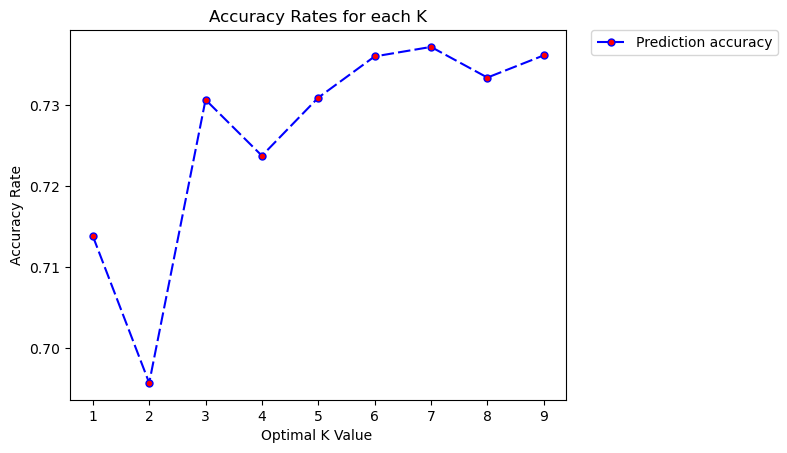

Optimal K Value is  7  with accuracy score  73.72  %
>Best accuracy is  73.72  %
>Average accuracy is  72.64  %
>Worst accuracy is  69.57  %


In [26]:
k_range = list(range(1,10)) ## Range for finding K 
result_scores = [] ## List for storing the accuracy of result prediction

for _ in k_range: ## Loop for finding K

 knn = KNeighborsClassifier(
 n_neighbors=_,
 metric = 'euclidean'
 )
 clf = knn.fit(X_train, y_train)
 result = clf.predict(X_test)
 result_scores.append(accuracy_score(y_test, result)) ## Store the accuracy for each K finding
 
#### plot results for finding K
plt.plot(k_range, result_scores, 'y', dashes=[6, 2], label = "Prediction accuracy",
 color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='5')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Optimal K Value ')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rates for each K')
plt.show()
####

_index = result_scores.index(np.amax(result_scores)) ## Find the best K value
optimal_K = _index+1 

print('Optimal K Value is ',optimal_K,' with accuracy score ',round(result_scores[_index]*100,2),' %')
print('>Best accuracy is ',round(np.amax(result_scores)*100,2),' %')
print('>Average accuracy is ',round((sum(result_scores)/len(result_scores))*100,2),' %')
print('>Worst accuracy is ',round(np.amin(result_scores)*100,2),' %')

### Retrain the model with the best K value.

In [27]:
knn = KNeighborsClassifier(
 n_neighbors=optimal_K,
 metric = 'euclidean'
)

clf = knn.fit(X_train, y_train)
result = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, result)*100} %\n")
print(classification_report(y_test, result))

print('Confusion matrix:')
mt = metrics.confusion_matrix(y_test, result)
print(mt)

Accuracy: 73.72196139801773 %

 precision recall f1-score support

 0 0.75 0.69 0.72 3745
 1 0.72 0.79 0.75 3923

accuracy 0.74 7668
 macro avg 0.74 0.74 0.74 7668
weighted avg 0.74 0.74 0.74 7668

Confusion matrix:
[[2573 1172]
 [ 843 3080]]


## 1.2 RandomForest

### Train with algorithms RandomForest

In [28]:
rdf_estimator_num = 100 ## Set the number of trees for RandomForest
random_state = 42 ## Set the seed so that the random data used for training is the same every time.

In [29]:
rdf=RandomForestClassifier( ## create RandomForest classifier 
 n_estimators = rdf_estimator_num, ## number of trees for RandomForest
 max_depth = 10, ## Max-depth value
 random_state = random_state ## seed ensures the random training data is the same every time
)

clf = rdf.fit(X_train, y_train) ## Train the model with RandomForest classifier
result = clf.predict(X_test) ## Apply prediction model to test dataset

print(f"Accuracy: {accuracy_score(y_test, result)*100} %\n")
print(classification_report(y_test, result))

print('Confusion matrix:')
mt = metrics.confusion_matrix(y_test, result)
print(mt)

Accuracy: 72.45696400625978 %

 precision recall f1-score support

 0 0.70 0.76 0.73 3745
 1 0.75 0.69 0.72 3923

accuracy 0.72 7668
 macro avg 0.73 0.73 0.72 7668
weighted avg 0.73 0.72 0.72 7668

Confusion matrix:
[[2847 898]
 [1214 2709]]


### Find the best Max-depth value

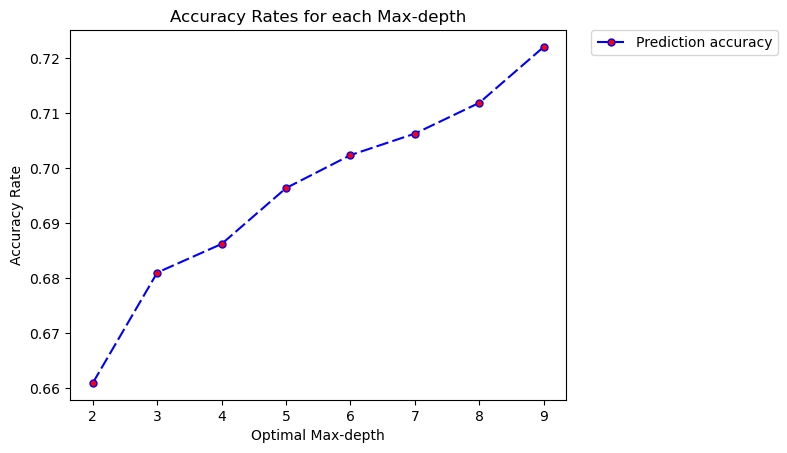

Optimal Max-depth is  9  with accuracy score  72.21  %
>Best accuracy is  72.21  %
>Average accuracy is  69.59  %
>Worst accuracy is  66.09  %


In [30]:
max_depth_range = list(range(2,10)) ## Range for finding values. Max-depth
result_scores = [] 

for _ in max_depth_range:

 rdf=RandomForestClassifier(
 n_estimators=rdf_estimator_num,
 max_depth = _,
 random_state = random_state
 )
 clf = rdf.fit(X_train, y_train)
 result = clf.predict(X_test)
 result_scores.append(accuracy_score(y_test, result))

plt.plot(max_depth_range, result_scores, 'y', dashes=[6, 2], label = "Prediction accuracy",
 color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='5')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Optimal Max-depth')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rates for each Max-depth')
plt.show()

_index = result_scores.index(np.amax(result_scores))
optimal_max_depth = _index+2

print('Optimal Max-depth is ',optimal_max_depth,' with accuracy score ',round(result_scores[_index]*100,2),' %')
print('>Best accuracy is ',round(np.amax(result_scores)*100,2),' %')
print('>Average accuracy is ',round((sum(result_scores)/len(result_scores))*100,2),' %')
print('>Worst accuracy is ',round(np.amin(result_scores)*100,2),' %')

### Retrain the model with the best Max-depth value.

In [31]:
rdf=RandomForestClassifier(
 n_estimators = rdf_estimator_num,
 max_depth = optimal_max_depth,
 random_state = random_state
)

clf = rdf.fit(X_train, y_train)
result = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, result)*100} %\n")
print(classification_report(y_test, result))

print('Confusion matrix:')
mt = metrics.confusion_matrix(y_test, result)
print(mt)

Accuracy: 72.20918101199791 %

 precision recall f1-score support

 0 0.70 0.77 0.73 3745
 1 0.75 0.68 0.71 3923

accuracy 0.72 7668
 macro avg 0.72 0.72 0.72 7668
weighted avg 0.72 0.72 0.72 7668

Confusion matrix:
[[2871 874]
 [1257 2666]]


## 1.3 Support Vector Machine

### Practice with Support Vector Machine algorithm

In [32]:
svm=SVC( ## Create Support Vector Machine classifier 
 C=10, ## Regularization parameters
) 

clf = svm.fit(X_train, y_train) ## Train the model with Support Vector Machine classifier
result = clf.predict(X_test) ## Apply prediction model to test dataset

print(f"Accuracy: {accuracy_score(y_test, result)*100} %\n")
print(classification_report(y_test, result))

print('Confusion matrix:')
mt = metrics.confusion_matrix(y_test, result)
print(mt)

Accuracy: 72.91340636411059 %

 precision recall f1-score support

 0 0.72 0.72 0.72 3745
 1 0.73 0.74 0.74 3923

accuracy 0.73 7668
 macro avg 0.73 0.73 0.73 7668
weighted avg 0.73 0.73 0.73 7668

Confusion matrix:
[[2693 1052]
 [1025 2898]]


### Find the best C value.

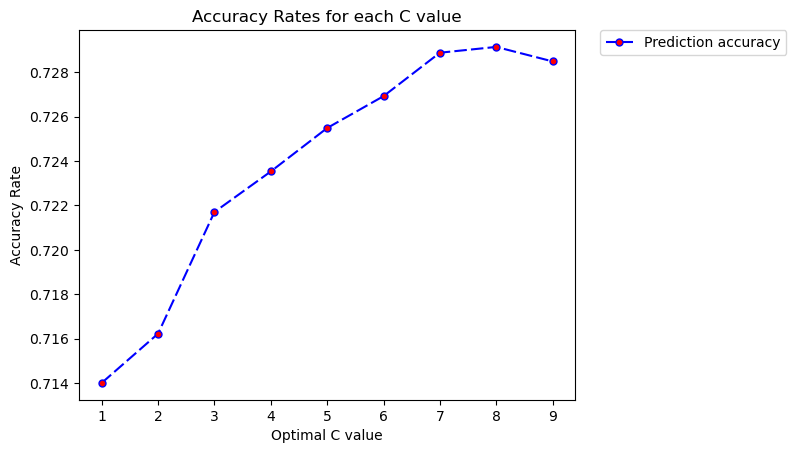

Optimal C value is  8  with accuracy score  72.91  %
>Best accuracy is  72.91  %
>Average accuracy is  72.38  %
>Worst accuracy is  71.4  %


In [33]:
regularization_range = list(range(1,10)) ## Range for solving C
result_scores = [] 

for _ in regularization_range:

 svm=SVC(
 C=_,
 )
 clf = svm.fit(X_train, y_train)
 result = clf.predict(X_test)
 result_scores.append(accuracy_score(y_test, result))

plt.plot(regularization_range, result_scores, 'y', dashes=[6, 2], label = "Prediction accuracy",
 color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='5')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Optimal C value')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rates for each C value')
plt.show()

_index = result_scores.index(np.amax(result_scores))
optimal_c = _index+1

print('Optimal C value is ',optimal_c,' with accuracy score ',round(result_scores[_index]*100,2),' %')
print('>Best accuracy is ',round(np.amax(result_scores)*100,2),' %')
print('>Average accuracy is ',round((sum(result_scores)/len(result_scores))*100,2),' %')
print('>Worst accuracy is ',round(np.amin(result_scores)*100,2),' %')

### Retrain the model with the best C value.

In [34]:
svm=SVC( ## Create Support Vector Machine classifier 
 C=optimal_c,
) 

clf = svm.fit(X_train, y_train) ## Train the model with Support Vector Machine classifier
result = clf.predict(X_test) ## Apply prediction model to test dataset

print(f"Accuracy: {accuracy_score(y_test, result)*100} %\n")
print(classification_report(y_test, result))

print('Confusion matrix:')
mt = metrics.confusion_matrix(y_test, result)
print(mt)

Accuracy: 72.91340636411059 %

 precision recall f1-score support

 0 0.72 0.72 0.72 3745
 1 0.74 0.74 0.74 3923

accuracy 0.73 7668
 macro avg 0.73 0.73 0.73 7668
weighted avg 0.73 0.73 0.73 7668

Confusion matrix:
[[2705 1040]
 [1037 2886]]


## 1.4 Light Gradient Boosted Machine

### Train with Light GBM algorithm

In [33]:
lgbm_learning_rate = 0.05
lgbm_epocs = 100 ## Number of learning iterations
num_class = len(set(_Y)) ## Number of solution types

params={}
params['verbose'] = -1 ## Turn off display
params['learning_rate'] = lgbm_learning_rate
params['boosting_type'] = 'gbdt' ## GradientBoostingDecisionTree
params['objective'] = 'multiclass' ## Multi-class target feature
params['metric'] = 'multi_logloss' ## metric for multi-class
params['max_depth'] = 100
params['random_state'] = random_state
params['num_class'] = num_class 

In [34]:
lgbm_train_set = lgb.Dataset(X_train, label=y_train) ## Create a Data set for training the LightGBM model

clf = lgb.train(
 params,
 lgbm_train_set,
 lgbm_epocs
)

result = clf.predict(X_test)
result = np.argmax(result, axis=1) ## Round values to integers

print(f"Accuracy: {accuracy_score(y_test, result)*100} %\n")
print(classification_report(y_test, result))

print('Confusion matrix:')
mt = metrics.confusion_matrix(y_test, result)
print(mt)

Accuracy: 84.66353677621284 %

 precision recall f1-score support

 0 0.89 0.79 0.84 1928
 1 0.81 0.90 0.85 1906

accuracy 0.85 3834
 macro avg 0.85 0.85 0.85 3834
weighted avg 0.85 0.85 0.85 3834

Confusion matrix:
[[1529 399]
 [ 189 1717]]


### Find the best Max-depth value

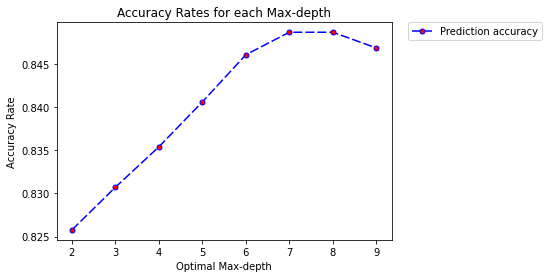

Optimal Max-depth is  7  with accuracy score  84.87  %
>Best accuracy is  84.87  %
>Average accuracy is  84.04  %
>Worst accuracy is  82.58  %


In [35]:
max_depth_range = list(range(2,10)) ## Range for finding values. Max-depth
result_scores = [] 

for _ in max_depth_range:
 
 params['max_depth'] = _
 
 clf = lgb.train(
 params,
 lgbm_train_set,
 lgbm_epocs
 )
 
 result = clf.predict(X_test)
 result = np.argmax(result, axis=1)
 result_scores.append(accuracy_score(y_test, result))

plt.plot(max_depth_range, result_scores, 'y', dashes=[6, 2], label = "Prediction accuracy",
 color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='5')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Optimal Max-depth')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rates for each Max-depth')
plt.show()

_index = result_scores.index(np.amax(result_scores))
optimal_max_depth = _index+2

print('Optimal Max-depth is ',optimal_max_depth,' with accuracy score ',round(result_scores[_index]*100,2),' %')
print('>Best accuracy is ',round(np.amax(result_scores)*100,2),' %')
print('>Average accuracy is ',round((sum(result_scores)/len(result_scores))*100,2),' %')
print('>Worst accuracy is ',round(np.amin(result_scores)*100,2),' %')

In [36]:
params['max_depth'] = optimal_max_depth

lgbm_train_set = lgb.Dataset(X_train, label=y_train) 

clf = lgb.train(
 params,
 lgbm_train_set,
 lgbm_epocs
)

result = clf.predict(X_test)
result = np.argmax(result, axis=1)

print(f"Accuracy: {accuracy_score(y_test, result)*100} %\n")
print(classification_report(y_test, result))

print('Confusion matrix:')
mt = metrics.confusion_matrix(y_test, result)
print(mt)

Accuracy: 84.87219613980177 %

 precision recall f1-score support

 0 0.89 0.80 0.84 1928
 1 0.81 0.90 0.86 1906

accuracy 0.85 3834
 macro avg 0.85 0.85 0.85 3834
weighted avg 0.85 0.85 0.85 3834

Confusion matrix:
[[1533 395]
 [ 185 1721]]


# 2. CROSS-VALIDATION METHOD

#### Set number of folds for cross validation

In [37]:
cv = 10 ## Set k-fold for data partitioning.

## 2.1 K-Nearest Neighbor

In [38]:
scores_cv = []

knn = KNeighborsClassifier( 
 n_neighbors=3,
 metric = 'euclidean'
)

scores_cv = cross_val_score( ## store the results of each fold 
 knn,
 _X,
 _Y,
 cv = cv
)

print(f"Cross validation score: {round(scores_cv.mean()*100,2)} %")
print(f"Standard deviation: {round(scores_cv.std(),9)}")

indx = 1

for _ in scores_cv:
 if _ == np.amax(scores_cv):
 print(f'\033[91m Accuracy in fold {indx} : {round(_*100,2)} %\033[90m')
 else:
 print(f'Accuracy in fold {indx} : {round(_*100,2)} %')
indx+=1

Cross validation score: 84.07 %
Standard deviation: 0.008333538
Accuracy in fold 1 : 82.79 %
Accuracy in fold 2 : 84.72 %
Accuracy in fold 3 : 83.62 %
Accuracy in fold 4 : 84.72 %
 Accuracy in fold 5 : 85.39 %
Accuracy in fold 6 : 83.26 %
Accuracy in fold 7 : 83.1 %
Accuracy in fold 8 : 84.3 %
Accuracy in fold 9 : 84.97 %
Accuracy in fold 10 : 83.87 %


### Find the best value of K using the results of Cross-validation

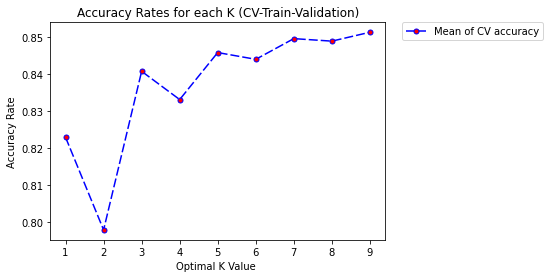

Optimal K Value is  9  with CV's score  85.13  %
>Standard deviation  0.007445173
>Best CV's score  85.13  %
>Average CV's score  83.71  %
>Worst CV's score  79.79  %


In [39]:
k_range = list(range(1,10))
scores_cv = []
std_cv = []

for _ in k_range:

    knn = KNeighborsClassifier(
        n_neighbors=_,
        metric = 'euclidean'
    )

    scores = cross_val_score(
        knn,
        _X,
        _Y,
        cv=cv
    )

    scores_cv.append(scores.mean())
    std_cv.append(scores.std())

plt.plot(k_range, scores_cv, 'y', dashes=[6, 2], label = "Mean of CV accuracy",
         color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='5')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Optimal K Value ')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rates for each K (CV-Train-Validation)')
plt.show()

_index = scores_cv.index(np.amax(scores_cv))

optimal_K = _index+1

print('Optimal K Value is ',optimal_K,' with CV\'s score ',round(scores_cv[_index]*100,2),' %')
print('>Standard deviation ',round(std_cv[_index],9))
print('>Best CV\'s score ',round(np.amax(scores_cv)*100,2),' %')
print('>Average CV\'s score ',round((sum(scores_cv)/len(scores_cv))*100,2),' %')
print('>Worst CV\'s score ',round(np.amin(scores_cv)*100,2),' %')

### ฝึกฝนโมเดลอีกครั้งด้วยค่า K ที่ดีที่สุด

In [40]:
scores_cv = []

knn = KNeighborsClassifier( 
    n_neighbors=optimal_K,
    metric = 'euclidean'
) 

scores_cv = cross_val_score(
    knn,
    _X,
    _Y,
    cv = cv
)

print(f"Cross validation score: {round(scores_cv.mean()*100,2)} %")
print(f"Standard deviation: {round(scores_cv.std(),9)}")

indx = 1

for _ in scores_cv:
    if _ == np.amax(scores_cv):
        print(f'\033[91m Accuracy in fold {indx} : {round(_*100,2)} %\033[90m')
    else:
        print(f'Accuracy in fold {indx} : {round(_*100,2)} %')
    indx+=1

Cross validation score: 85.13 %
Standard deviation: 0.007445173
Accuracy in fold 1 : 84.09 %
Accuracy in fold 2 : 86.02 %
Accuracy in fold 3 : 85.34 %
Accuracy in fold 4 : 85.19 %
Accuracy in fold 5 : 84.87 %
Accuracy in fold 6 : 84.66 %
Accuracy in fold 7 : 83.99 %
Accuracy in fold 8 : 85.34 %
 Accuracy in fold 9 : 86.53 %
Accuracy in fold 10 : 85.23 %


## 2.2 RandomForest

In [41]:
rdf_estimator_num = 100
random_state = 42

In [42]:
scores_cv = []

rdf=RandomForestClassifier(
    n_estimators = rdf_estimator_num, 
    max_depth = 10, 
    random_state = random_state 
)

scores_cv = cross_val_score(
    rdf,
    _X,
    _Y,
    cv = cv
)

print(f"Cross validation score: {round(scores_cv.mean()*100,2)} %")
print(f"Standard deviation: {round(scores_cv.std(),9)}")

indx = 1
for _ in scores_cv:
    if _ == np.amax(scores_cv):
        print(f'\033[91m Accuracy in fold {indx} : {round(_*100,2)} %\033[90m')
    else:
        print(f'Accuracy in fold {indx} : {round(_*100,2)} %')
    indx+=1

Cross validation score: 85.03 %
Standard deviation: 0.008531092
Accuracy in fold 1 : 82.58 %
Accuracy in fold 2 : 85.45 %
Accuracy in fold 3 : 85.45 %
Accuracy in fold 4 : 85.39 %
Accuracy in fold 5 : 85.29 %
Accuracy in fold 6 : 85.19 %
Accuracy in fold 7 : 84.72 %
Accuracy in fold 8 : 85.55 %
 Accuracy in fold 9 : 85.59 %
Accuracy in fold 10 : 85.07 %


### Find the best Max-depth value using the results of Cross-validation

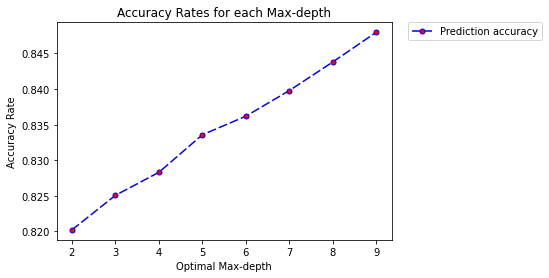

Optimal Max-depth is  9  with CV's score  84.8  %
>Standard deviation  0.007907132
>Best CV's score  84.8  %
>Average CV's score  83.44  %
>Worst CV's score  82.02  %


In [43]:
max_depth_range = list(range(2,10)) 
scores_cv = [] 
std_cv = []

for _ in max_depth_range:
    
    rdf=RandomForestClassifier(
        n_estimators=rdf_estimator_num,
        max_depth = _,
        random_state = random_state
    )

    scores = cross_val_score(
        rdf,
        _X,
        _Y,
        cv=cv
    )

    scores_cv.append(scores.mean())
    std_cv.append(scores.std())

plt.plot(max_depth_range, scores_cv, 'y', dashes=[6, 2], label = "Prediction accuracy",
         color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='5')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Optimal Max-depth')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rates for each Max-depth')
plt.show()

_index = scores_cv.index(np.amax(scores_cv))

optimal_max_depth = _index+2

print('Optimal Max-depth is ',optimal_max_depth,' with CV\'s score ',round(scores_cv[_index]*100,2),' %')
print('>Standard deviation ',round(std_cv[_index],9))
print('>Best CV\'s score ',round(np.amax(scores_cv)*100,2),' %')
print('>Average CV\'s score ',round((sum(scores_cv)/len(scores_cv))*100,2),' %')
print('>Worst CV\'s score ',round(np.amin(scores_cv)*100,2),' %')

### ฝึกฝนโมเดลอีกครั้งด้วยค่า Max-depth ที่ดีที่สุด

In [44]:
scores_cv = []

rdf=RandomForestClassifier(
    n_estimators = rdf_estimator_num, 
    max_depth = optimal_max_depth, 
    random_state = random_state 
)

scores_cv = cross_val_score(
    rdf,
    _X,
    _Y,
    cv = cv
)

print(f"Cross validation score: {round(scores_cv.mean()*100,2)} %")
print(f"Standard deviation: {round(scores_cv.std(),9)}")

indx = 1
for _ in scores_cv:
    if _ == np.amax(scores_cv):
        print(f'\033[91m Accuracy in fold {indx} : {round(_*100,2)} %\033[90m')
    else:
        print(f'Accuracy in fold {indx} : {round(_*100,2)} %')
    indx+=1

Cross validation score: 84.8 %
Standard deviation: 0.007907132
Accuracy in fold 1 : 82.73 %
Accuracy in fold 2 : 84.72 %
Accuracy in fold 3 : 84.66 %
Accuracy in fold 4 : 85.24 %
Accuracy in fold 5 : 85.03 %
Accuracy in fold 6 : 85.03 %
Accuracy in fold 7 : 84.45 %
Accuracy in fold 8 : 85.65 %
 Accuracy in fold 9 : 85.7 %
Accuracy in fold 10 : 84.76 %


## 2.3 Support Vector Machine

In [45]:
scores_cv = []

svm=SVC(
    C=10,
) 

scores_cv = cross_val_score(
    svm,
    _X,
    _Y,
    cv = cv
)

print(f"Cross validation score: {round(scores_cv.mean()*100,2)} %")
print(f"Standard deviation: {round(scores_cv.std(),9)}")

indx = 1
for _ in scores_cv:
    if _ == np.amax(scores_cv):
        print(f'\033[91m Accuracy in fold {indx} : {round(_*100,2)} %\033[90m')
    else:
        print(f'Accuracy in fold {indx} : {round(_*100,2)} %')
    indx+=1

Cross validation score: 85.18 %
Standard deviation: 0.007866494
Accuracy in fold 1 : 83.46 %
Accuracy in fold 2 : 85.86 %
Accuracy in fold 3 : 85.45 %
Accuracy in fold 4 : 85.71 %
Accuracy in fold 5 : 84.82 %
Accuracy in fold 6 : 85.19 %
Accuracy in fold 7 : 84.4 %
Accuracy in fold 8 : 85.81 %
 Accuracy in fold 9 : 86.27 %
Accuracy in fold 10 : 84.86 %


### Find the best value of C using the results of Cross-validation

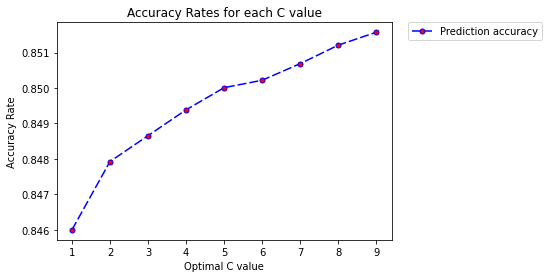

Optimal C value is  9  with CV's score  85.16  %
>Standard deviation  0.008004981
>Best CV's score  85.16  %
>Average CV's score  84.95  %
>Worst CV's score  84.6  %


In [46]:
regularization_range = list(range(1,10))
scores_cv = []
std_cv = []

for _ in regularization_range:
    
    svm=SVC(
        C=_,
    )

    scores = cross_val_score(
        svm,
        _X,
        _Y,
        cv=cv
    )

    scores_cv.append(scores.mean())
    std_cv.append(scores.std())

plt.plot(regularization_range, scores_cv, 'y', dashes=[6, 2], label = "Prediction accuracy",
         color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='5')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Optimal C value')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rates for each C value')
plt.show()

_index = scores_cv.index(np.amax(scores_cv))

optimal_c = _index+1

print('Optimal C value is ',optimal_c,' with CV\'s score ',round(scores_cv[_index]*100,2),' %')
print('>Standard deviation ',round(std_cv[_index],9))
print('>Best CV\'s score ',round(np.amax(scores_cv)*100,2),' %')
print('>Average CV\'s score ',round((sum(scores_cv)/len(scores_cv))*100,2),' %')
print('>Worst CV\'s score ',round(np.amin(scores_cv)*100,2),' %')

### Retrain the model with the best C value.

In [47]:
scores_cv = []

svm=SVC(
 C=optimal_c,
) 

scores_cv = cross_val_score(
 svm,
 _X,
 _Y,
 cv = cv
)

print(f"Cross validation score: {round(scores_cv.mean()*100,2)} %")
print(f"Standard deviation: {round(scores_cv.std(),9)}")

indx = 1
for _ in scores_cv:
 if _ == np.amax(scores_cv):
 print(f'\033[91m Accuracy in fold {indx} : {round(_*100,2)} %\033[90m')
 else:
 print(f'Accuracy in fold {indx} : {round(_*100,2)} %')
indx+=1

Cross validation score: 85.16 %
Standard deviation: 0.008004981
Accuracy in fold 1 : 83.41 %
Accuracy in fold 2 : 85.86 %
Accuracy in fold 3 : 85.5 %
Accuracy in fold 4 : 85.76 %
Accuracy in fold 5 : 84.72 %
Accuracy in fold 6 : 85.03 %
Accuracy in fold 7 : 84.45 %
Accuracy in fold 8 : 85.81 %
 Accuracy in fold 9 : 86.22 %
Accuracy in fold 10 : 84.81 %


## 2.4 Light Gradient Boosted Machine

In [48]:
lgbm_learning_rate = 0.05
lgbm_epocs = 100 
num_class = len(set(_Y)) 
random_state = 42

params={}
params['verbose'] = -1 
params['learning_rate'] = lgbm_learning_rate
params['boosting_type'] = 'gbdt'
params['objective'] = 'multiclass'
params['metric'] = 'multi_logloss'
params['max_depth'] = 100
params['random_state'] = random_state
params['num_class'] = num_class 

In [49]:
scores_cv = []

skf = StratifiedKFold( ## Split data using StratifiedKFold
 n_splits=cv, ## number of folds
 shuffle=True, 
 random_state=random_state
)

for train_index, test_index in skf.split(_X, _Y): ## loop for training each fold

 x_train_fold, x_test_fold = _X[train_index], _X[test_index] ## Split image data
 y_train_fold, y_test_fold = _Y[train_index], _Y[test_index] ## Divide results

 lgbm_train_set = lgb.Dataset(x_train_fold, label=y_train_fold)

 clf = lgb.train(
 params,
 lgbm_train_set,
 lgbm_epocs
 )

 lgb_predictions = clf.predict(x_test_fold)
 lgb_pred = np.argmax(lgb_predictions, axis=1)
 
 scores_cv.append(accuracy_score(y_test_fold, lgb_pred))
 
print(f"Cross validation score: {round((sum(scores_cv)/len(scores_cv))*100,2)} %")
print(f"Standard deviation: {round(np.std(np.array(scores_cv)),9)}")

indx = 1
for _ in scores_cv:
 if _ == np.amax(scores_cv):
 print(f'\033[91m Accuracy in fold {indx} : {round(_*100,2)} %\033[90m')
 else:
 print(f'Accuracy in fold {indx} : {round(_*100,2)} %')
indx+=1

Cross validation score: 85.23 %
Standard deviation: 0.006468179
Accuracy in fold 1 : 84.72 %
Accuracy in fold 2 : 85.86 %
 Accuracy in fold 3 : 85.92 %
Accuracy in fold 4 : 85.6 %
Accuracy in fold 5 : 84.3 %
Accuracy in fold 6 : 85.34 %
Accuracy in fold 7 : 83.93 %
Accuracy in fold 8 : 85.76 %
Accuracy in fold 9 : 85.39 %
Accuracy in fold 10 : 85.44 %


### Find the best Max-depth value using the results of Cross-validation

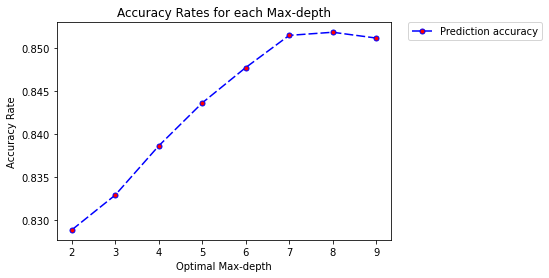

Optimal Max-depth is  8  with CV's score  85.19  %
>Standard deviation  0.006518111
>Best CV's score  85.19  %
>Average CV's score  84.33  %
>Worst CV's score  82.88  %


In [50]:
max_depth_range = list(range(2,10))
scores_cv = []
std_cv = []

for _ in max_depth_range:

    skf = StratifiedKFold(
        n_splits=cv, 
        shuffle=True, 
        random_state=random_state
    )

    params['max_depth']= _

    lst_accu_stratified = []

    for train_index, test_index in skf.split(_X, _Y):

        x_train_fold, x_test_fold = _X[train_index], _X[test_index]
        y_train_fold, y_test_fold = _Y[train_index], _Y[test_index]

        lgbm_train_set = lgb.Dataset(x_train_fold, label=y_train_fold)
        
        clf = lgb.train(
            params,
            lgbm_train_set,
            lgbm_epocs
            )

        lgb_predictions = clf.predict(x_test_fold)
        lgb_pred = np.argmax(lgb_predictions, axis=1)
        
        lst_accu_stratified.append(accuracy_score(y_test_fold, lgb_pred))

    scores_cv.append(sum(lst_accu_stratified)/len(lst_accu_stratified))
    std_cv.append(np.std(np.array(lst_accu_stratified)))

    
plt.plot(max_depth_range, scores_cv, 'y', dashes=[6, 2], label = "Prediction accuracy",
         color='blue',linestyle='dashed',marker='o', markerfacecolor='red', markersize='5')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Optimal Max-depth')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rates for each Max-depth')
plt.show()

_index = scores_cv.index(np.amax(scores_cv))

optimal_max_depth = _index+2

print('Optimal Max-depth is ',optimal_max_depth,' with CV\'s score ',round(scores_cv[_index]*100,2),' %')
print('>Standard deviation ',round(std_cv[_index],9))
print('>Best CV\'s score ',round(np.amax(scores_cv)*100,2),' %')
print('>Average CV\'s score ',round((sum(scores_cv)/len(scores_cv))*100,2),' %')
print('>Worst CV\'s score ',round(np.amin(scores_cv)*100,2),' %')

### Retrain the model with the best Max-depth value.

In [51]:
scores_cv = []

params['max_depth']= optimal_max_depth

skf = StratifiedKFold(
 n_splits=cv, 
 shuffle=True, 
 random_state=random_state
)

for train_index, test_index in skf.split(_X, _Y):

 x_train_fold, x_test_fold = _X[train_index], _X[test_index]
 y_train_fold, y_test_fold = _Y[train_index], _Y[test_index]

 lgbm_train_set = lgb.Dataset(x_train_fold, label=y_train_fold)

 clf = lgb.train(
 params,
 lgbm_train_set,
 lgbm_epocs
 )

 lgb_predictions = clf.predict(x_test_fold)
 lgb_pred = np.argmax(lgb_predictions, axis=1)
 
 scores_cv.append(accuracy_score(y_test_fold, lgb_pred))


print(f"Cross validation score: {round((sum(scores_cv)/len(scores_cv))*100,2)} %")
print(f"Standard deviation: {round(np.std(np.array(scores_cv)),9)}")

indx = 1
for _ in scores_cv:
 if _ == np.amax(scores_cv):
 print(f'\033[91m Accuracy in fold {indx} : {round(_*100,2)} %\033[90m')
 else:
 print(f'Accuracy in fold {indx} : {round(_*100,2)} %')
indx+=1

Cross validation score: 85.19 %
Standard deviation: 0.006518111
Accuracy in fold 1 : 84.45 %
Accuracy in fold 2 : 85.81 %
 Accuracy in fold 3 : 86.07 %
 Accuracy in fold 4 : 86.07 %
Accuracy in fold 5 : 84.56 %
Accuracy in fold 6 : 85.03 %
Accuracy in fold 7 : 84.09 %
Accuracy in fold 8 : 85.5 %
Accuracy in fold 9 : 85.28 %
Accuracy in fold 10 : 85.02 %
